In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from fancyimpute import KNN, IterativeImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from scipy import stats
import missingno as msno

In [2]:
df = pd.read_csv('churn_raw_data.csv')
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [3]:
df = df.drop(columns=['Unnamed: 0'], axis=1)
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [4]:
df.shape

(10000, 51)

In [5]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'City', 'State', 'County',
       'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone', 'Job',
       'Children', 'Age', 'Education', 'Employment', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education           

In [7]:
for col in df.columns:
    print(col, df[col].nunique())

CaseOrder 10000
Customer_id 10000
Interaction 10000
City 6058
State 52
County 1620
Zip 8583
Lat 8563
Lng 8655
Population 5933
Area 3
Timezone 25
Job 639
Children 11
Age 72
Education 12
Employment 5
Income 7506
Marital 5
Gender 3
Churn 2
Outage_sec_perweek 9993
Email 23
Contacts 8
Yearly_equip_failure 6
Techie 2
Contract 3
Port_modem 2
Tablet 2
InternetService 3
Phone 2
Multiple 2
OnlineSecurity 2
OnlineBackup 2
DeviceProtection 2
TechSupport 2
StreamingTV 2
StreamingMovies 2
PaperlessBilling 2
PaymentMethod 4
Tenure 9065
MonthlyCharge 9984
Bandwidth_GB_Year 8972
item1 7
item2 7
item3 8
item4 7
item5 7
item6 8
item7 7
item8 8


In [8]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col, df[col].isnull().sum())

Children 2495
Age 2475
Income 2490
Techie 2477
Phone 1026
TechSupport 991
Tenure 931
Bandwidth_GB_Year 1021


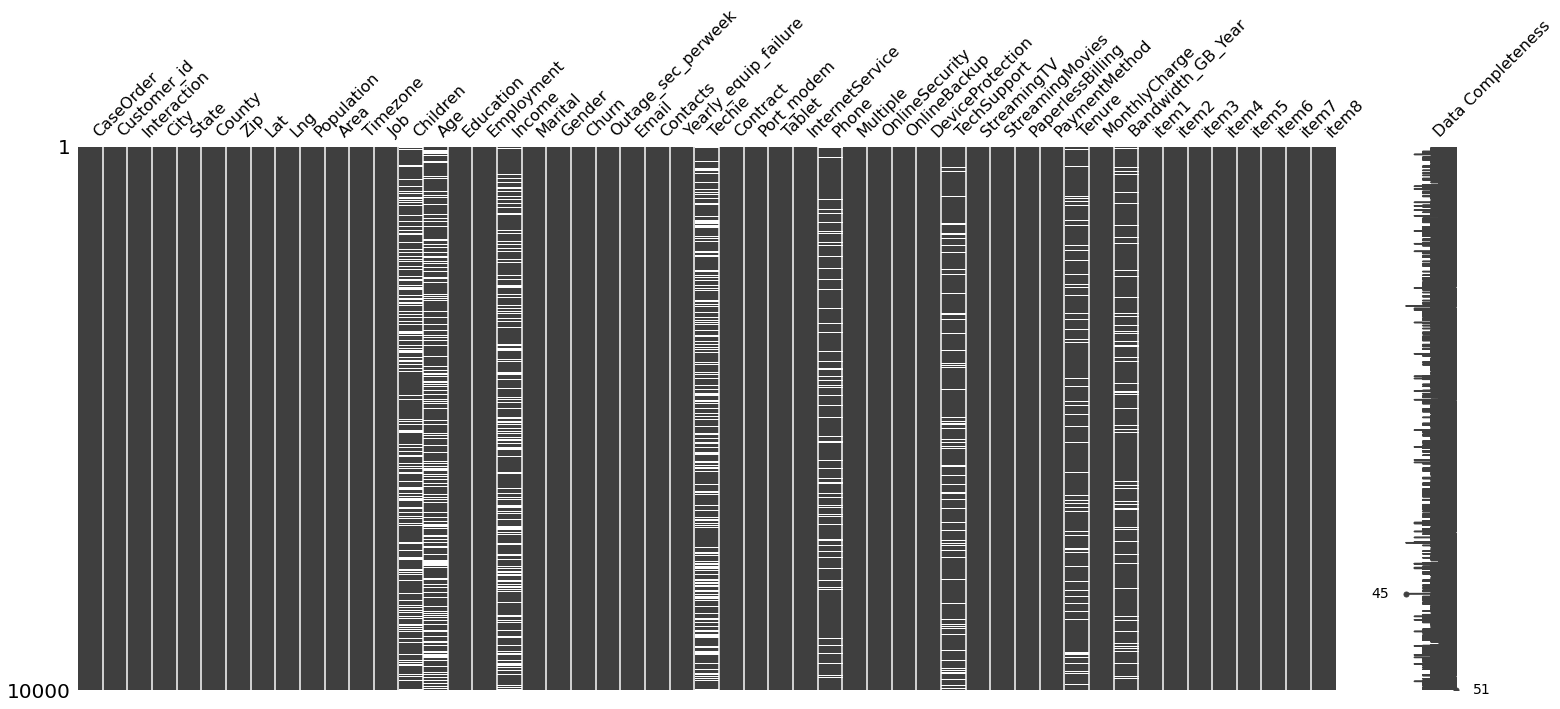

In [9]:
msno.matrix(df, labels=True)
plt.show()

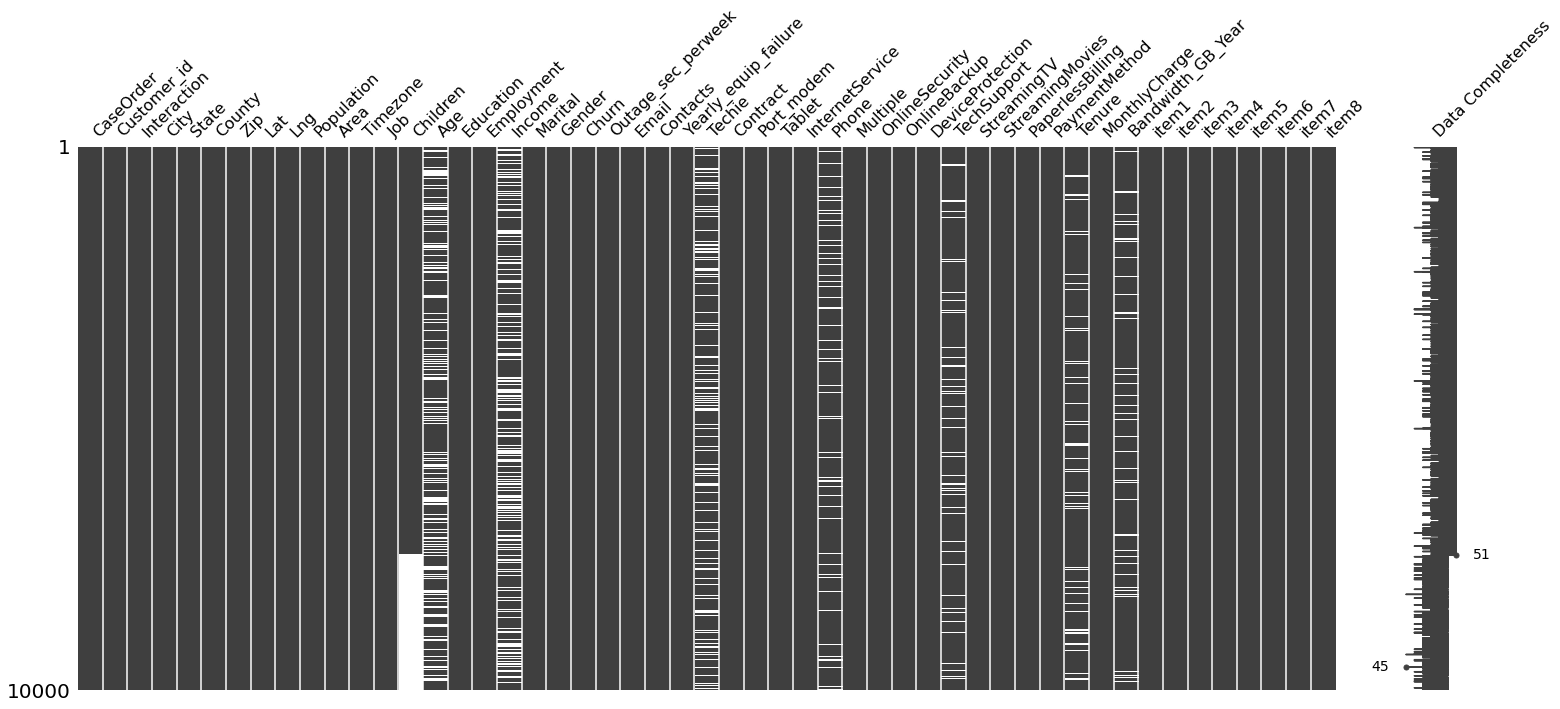

In [10]:
msno.matrix(df.sort_values(by='Children'), labels=True)
plt.show()

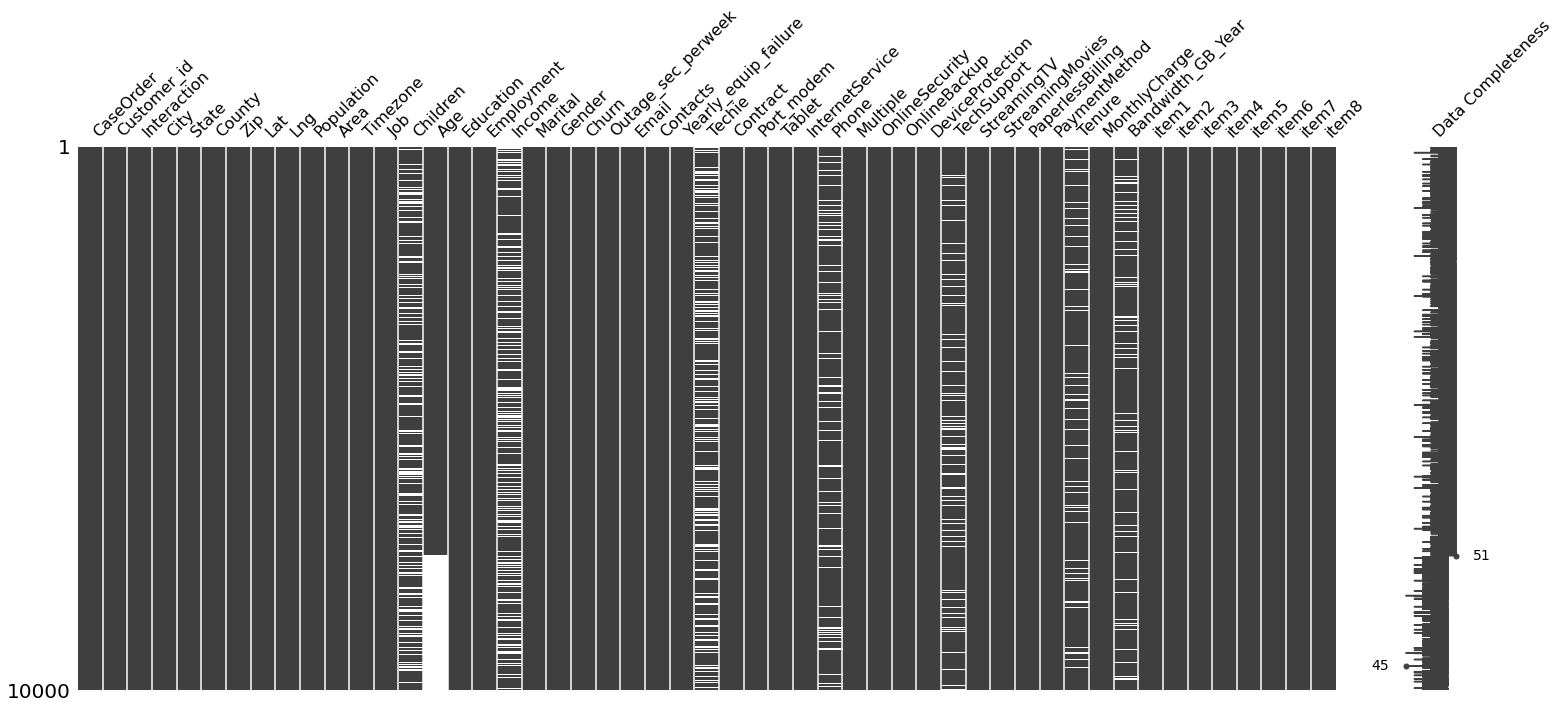

In [11]:
msno.matrix(df.sort_values(by='Age'), labels=True)
plt.show()

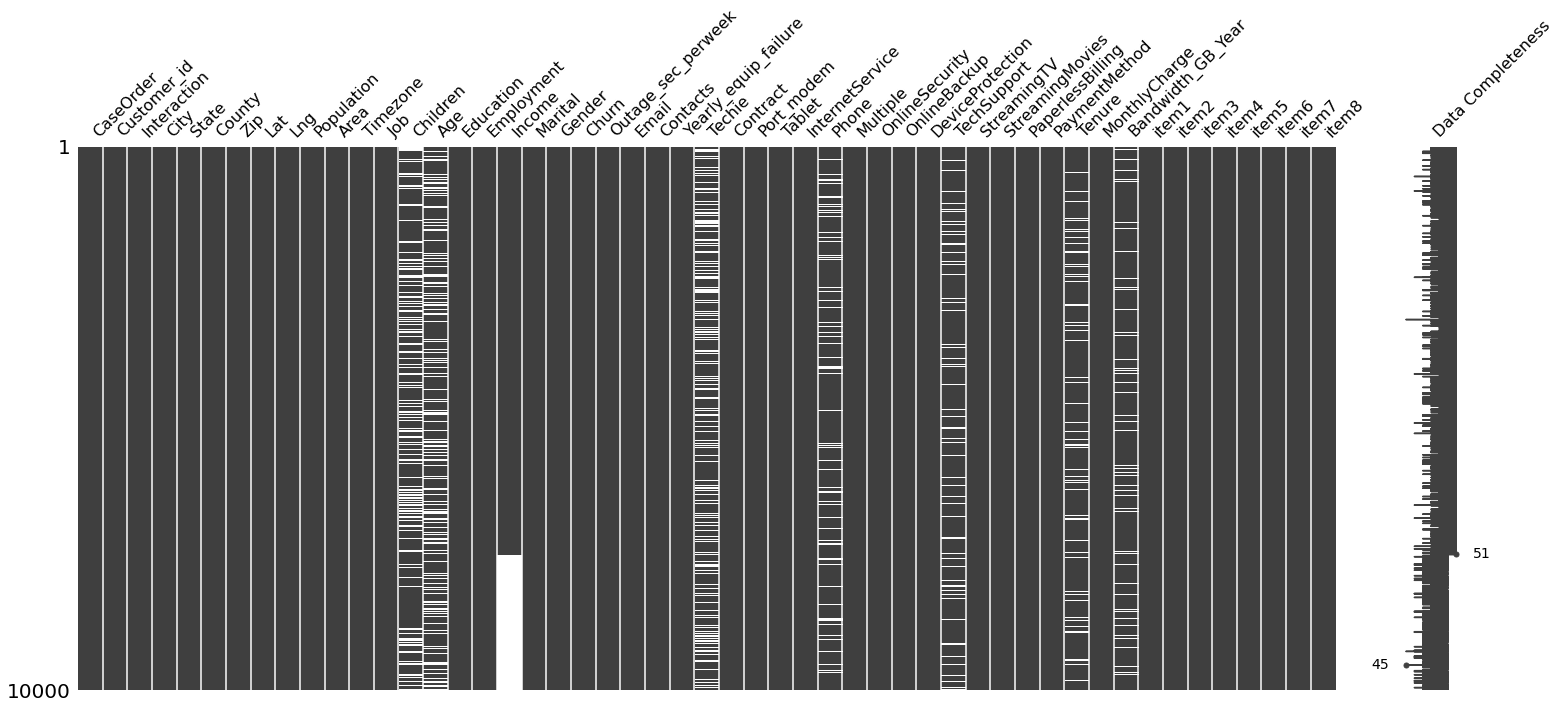

In [12]:
msno.matrix(df.sort_values(by='Income'), labels=True)
plt.show()

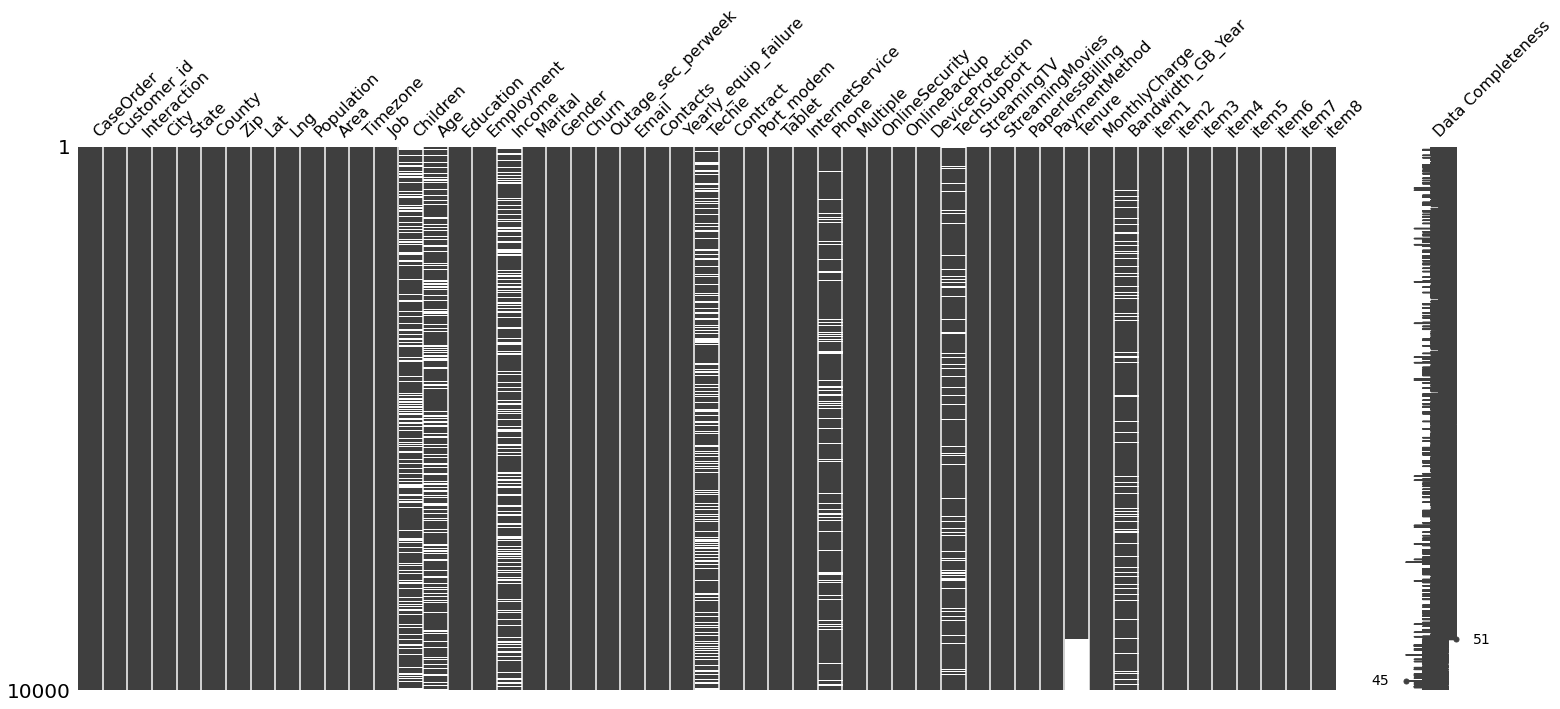

In [13]:
msno.matrix(df.sort_values(by='Tenure'), labels=True)
plt.show()

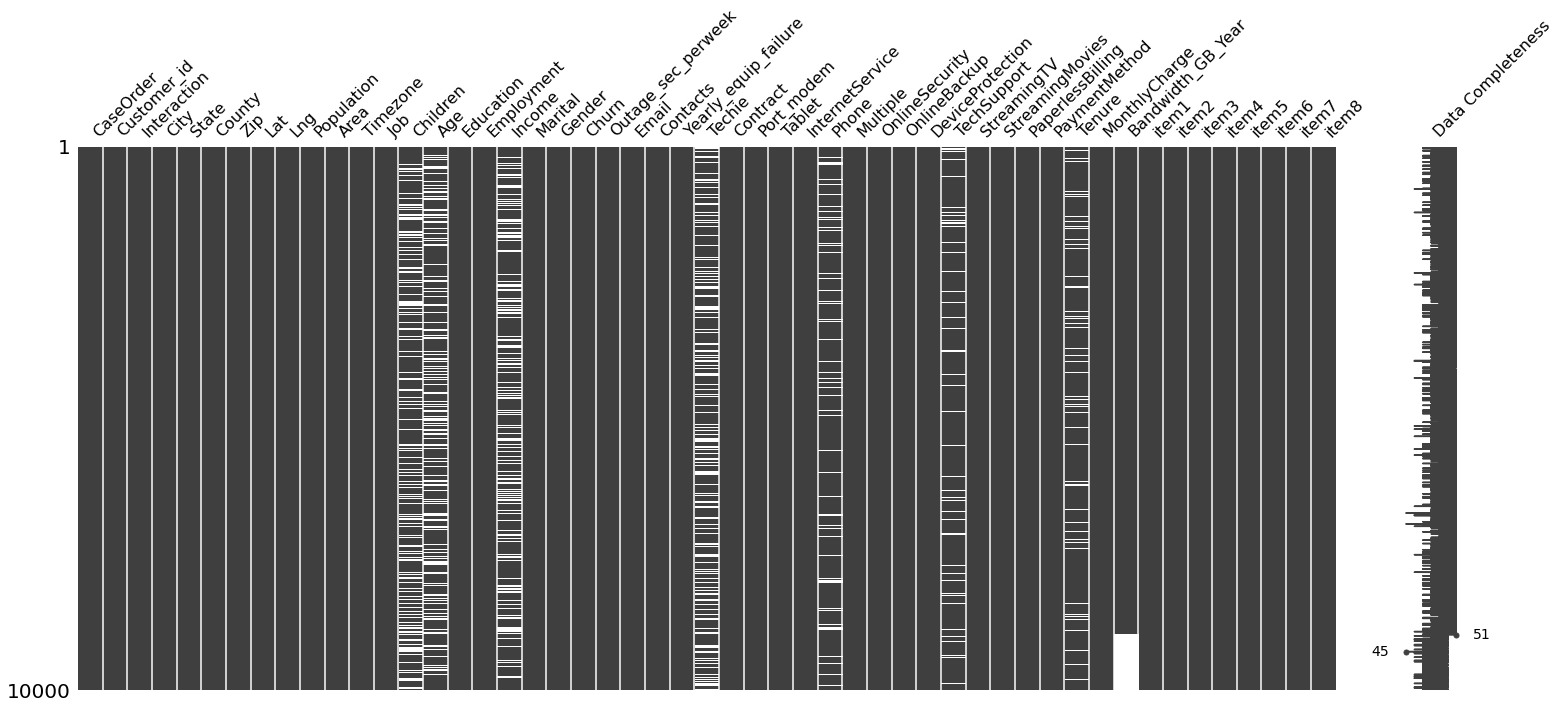

In [14]:
msno.matrix(df.sort_values(by='Bandwidth_GB_Year'), labels=True)
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education           

In [16]:
df['CaseOrder'].nunique()

10000

In [17]:
df['Customer_id'].nunique()

10000

In [18]:
df['Interaction'].nunique()

10000

In [19]:
df.duplicated().sum()

0

In [20]:
df['City'].nunique()

6058

In [21]:
top_cities = df.groupby('City')['Customer_id'].count()
top_cities.head()

City
Abbotsford     1
Abercrombie    1
Aberdeen       2
Abilene        2
Abingdon       1
Name: Customer_id, dtype: int64

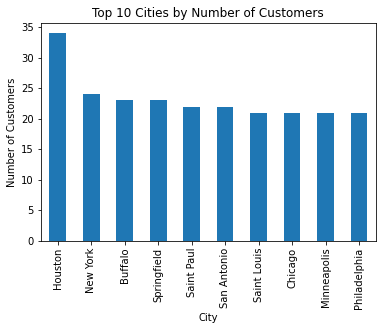

In [22]:
top_cities.sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('Number of Customers')
plt.xlabel('City')
plt.title('Top 10 Cities by Number of Customers')
plt.show()

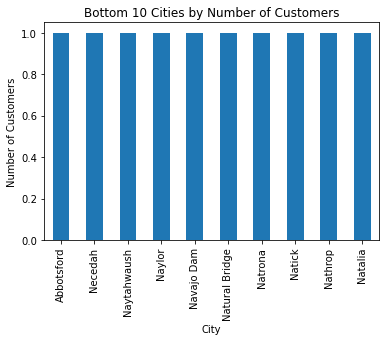

In [23]:
top_cities.sort_values(ascending=True)[:10].plot(kind='bar')
plt.ylabel('Number of Customers')
plt.xlabel('City')
plt.title('Bottom 10 Cities by Number of Customers')
plt.show()

In [24]:
df['State'].nunique()

52

In [25]:
df['State'].unique()

array(['AK', 'MI', 'OR', 'CA', 'TX', 'GA', 'TN', 'OK', 'FL', 'OH', 'PA',
       'PR', 'IA', 'ME', 'IL', 'WI', 'NC', 'AL', 'NM', 'VT', 'MD', 'NY',
       'WA', 'CT', 'NJ', 'DC', 'ND', 'LA', 'NE', 'WV', 'AZ', 'MO', 'WY',
       'MT', 'VA', 'KY', 'MN', 'KS', 'MA', 'IN', 'SC', 'NH', 'DE', 'MS',
       'ID', 'AR', 'SD', 'CO', 'HI', 'UT', 'RI', 'NV'], dtype=object)

In [26]:
df['County'].nunique()

1620

In [27]:
df['County'].value_counts()[:10]

Washington     111
Jefferson      100
Montgomery      99
Franklin        92
Los Angeles     91
Jackson         81
Monroe          72
Wayne           70
Madison         69
Marion          65
Name: County, dtype: int64

In [28]:
df['County'].value_counts()[-10:]

Leflore       1
Shannon       1
Bowman        1
Charlevoix    1
Keweenaw      1
Rooks         1
Cochise       1
Yauco         1
Hoke          1
Briscoe       1
Name: County, dtype: int64

In [29]:
df['Zip'].nunique()

8583

In [30]:
df['Zip'].value_counts()[:10]

32340    4
75077    4
44310    4
61764    4
16115    4
87063    4
24266    3
65565    3
67041    3
92069    3
Name: Zip, dtype: int64

In [31]:
df['Zip'].value_counts()[-10:]

29113    1
16726    1
53140    1
45211    1
84043    1
43788    1
58579    1
53526    1
79104    1
30523    1
Name: Zip, dtype: int64

In [32]:
df['Lat'].nunique()

8563

In [33]:
df['Lng'].nunique()

8655

In [34]:
print(df['Lat'].min(), df['Lat'].max())

17.96612 70.64066


In [35]:
print(df['Lng'].min(), df['Lng'].max())

-171.68815 -65.66785


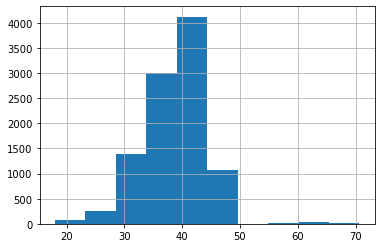

In [36]:
df['Lat'].hist()
plt.show()

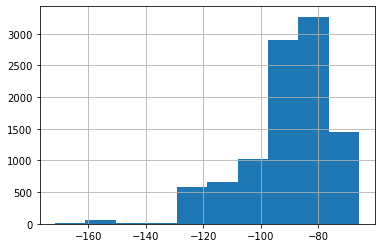

In [37]:
df['Lng'].hist()
plt.show()

In [38]:
print(df['Population'].min(), df['Population'].max())

0 111850


In [39]:
df[df['Population']==0]

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
13,14,X44200,780992d3-d758-4152-aceb-5d59edda3d15,East Livermore,ME,Androscoggin,4228,44.43256,-70.11501,0,...,185.659294,1948.694497,5,6,5,2,4,5,4,4
422,423,R912808,6f219638-1792-46b8-becb-c00fb17d13c1,Warren,MI,Macomb,48397,42.49501,-83.04105,0,...,199.657786,1537.296207,4,5,5,3,4,4,4,2
428,429,I415253,bc830a77-6237-4a32-b93f-69a86e5e4ff9,Bayside,NY,Queens,11359,40.79142,-73.77665,0,...,181.783616,2192.693797,3,3,3,4,4,6,4,3
434,435,K719786,13fa5f95-d4d8-4901-acd9-a77c35b8e512,Memphis,TN,Shelby,38132,35.07131,-90.00136,0,...,191.060807,801.470960,4,4,4,3,3,5,4,4
446,447,F812880,824f1894-19c9-42aa-8760-bc30fd3f6cdb,Caroleen,NC,Rutherford,28019,35.28035,-81.79052,0,...,240.991513,1886.312286,4,4,4,5,5,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9216,9217,X423883,ab4e0ff2-636f-4c0b-83e9-cddc9b8bad37,Memphis,TN,Shelby,38131,35.06631,-89.99205,0,...,163.393600,5088.812000,4,4,2,5,4,3,4,3
9441,9442,V137712,20fcd6b4-4ff8-4640-bc9b-2e70ff17cff5,New York,NY,New York,10152,40.75840,-73.97203,0,...,160.819000,5341.090000,4,4,3,4,2,4,3,4
9657,9658,Z405442,aea4abf3-99a6-45f3-b42d-5ca7fb01711f,Oak Island,MN,Lake of the Woods,56741,49.28436,-94.85821,0,...,196.166100,6064.836000,4,5,4,3,4,4,3,2
9702,9703,D366186,aed46bda-ec9b-4999-af74-0e4945b49e27,Vidalia,GA,Toombs,30475,32.22467,-82.36845,0,...,138.166500,5914.162000,3,3,2,5,2,3,3,4


In [40]:
df.loc[df['Population']==0, 'City']

13      East Livermore
422             Warren
428            Bayside
434            Memphis
446           Caroleen
             ...      
9216           Memphis
9441          New York
9657        Oak Island
9702           Vidalia
9944              Rome
Name: City, Length: 97, dtype: object

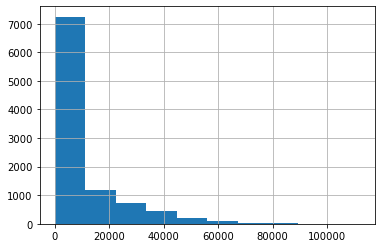

In [41]:
df['Population'].hist()
plt.show()

In [42]:
df['Area'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

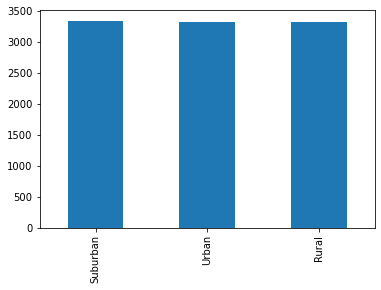

In [43]:
df['Area'].value_counts().plot(kind='bar')
plt.show()

In [44]:
df['Timezone'].nunique()

25

In [45]:
df['Timezone'].unique()

array(['America/Sitka', 'America/Detroit', 'America/Los_Angeles',
       'America/Chicago', 'America/New_York', 'America/Puerto_Rico',
       'America/Denver', 'America/Menominee', 'America/Phoenix',
       'America/Indiana/Indianapolis', 'America/Boise',
       'America/Kentucky/Louisville', 'Pacific/Honolulu',
       'America/Indiana/Petersburg', 'America/Nome', 'America/Anchorage',
       'America/Indiana/Knox', 'America/Juneau', 'America/Toronto',
       'America/Indiana/Winamac', 'America/Indiana/Vincennes',
       'America/North_Dakota/New_Salem', 'America/Indiana/Tell_City',
       'America/Indiana/Marengo', 'America/Ojinaga'], dtype=object)

In [46]:
df['Job'].nunique()

639

In [47]:
df['Job'].value_counts()[:10]

Occupational psychologist     30
Comptroller                   28
Hospital pharmacist           28
Horticultural therapist       28
Ranger/warden                 27
Special effects artist        27
Psychotherapist, child        27
Solicitor, Scotland           26
Television floor manager      26
Nurse, learning disability    26
Name: Job, dtype: int64

In [48]:
df['Job'].value_counts()[-10:]

Engineer, site                          8
Librarian, public                       8
Optometrist                             7
Health visitor                          7
Medical sales representative            7
Control and instrumentation engineer    6
Travel agency manager                   6
Accountant, chartered certified         6
Arboriculturist                         6
Toxicologist                            6
Name: Job, dtype: int64

In [49]:
df['Children'].nunique()

11

In [50]:
df['Children'].unique()

array([nan,  1.,  4.,  0.,  3.,  2.,  7.,  5.,  9.,  6., 10.,  8.])

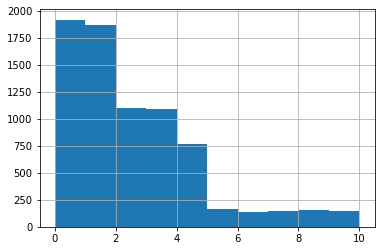

In [51]:
df['Children'].hist()
plt.show()

In [52]:
print(df['Children'].min(), df['Children'].max())

0.0 10.0


In [53]:
df['Age'].nunique()

72

In [54]:
print(df['Age'].min(), df['Age'].max())

18.0 89.0


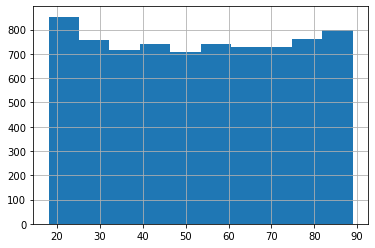

In [55]:
df['Age'].hist()
plt.show()

In [56]:
df['Education'].unique()

array(["Master's Degree", 'Regular High School Diploma',
       'Doctorate Degree', 'No Schooling Completed', "Associate's Degree",
       "Bachelor's Degree", 'Some College, Less than 1 Year',
       'GED or Alternative Credential',
       'Some College, 1 or More Years, No Degree',
       '9th Grade to 12th Grade, No Diploma',
       'Nursery School to 8th Grade', 'Professional School Degree'],
      dtype=object)

In [57]:
df['Education'].value_counts()

Regular High School Diploma                 2421
Bachelor's Degree                           1703
Some College, 1 or More Years, No Degree    1562
9th Grade to 12th Grade, No Diploma          870
Master's Degree                              764
Associate's Degree                           760
Some College, Less than 1 Year               652
Nursery School to 8th Grade                  449
GED or Alternative Credential                387
Professional School Degree                   198
No Schooling Completed                       118
Doctorate Degree                             116
Name: Education, dtype: int64

In [58]:
df['Employment'].unique()

array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

In [59]:
df['Employment'].value_counts()

Full Time     5992
Part Time     1042
Retired       1011
Unemployed     991
Student        964
Name: Employment, dtype: int64

In [60]:
print(df['Income'].min(), df['Income'].max())

740.66 258900.7


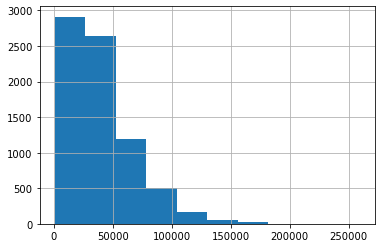

In [61]:
df['Income'].hist()
plt.show()

In [62]:
df.loc[df['Income'].isnull(), 'Employment'].value_counts()

Full Time     1486
Part Time      285
Retired        260
Student        235
Unemployed     224
Name: Employment, dtype: int64

In [63]:
df.loc[~df['Income'].isnull(), 'Employment'].value_counts()

Full Time     4506
Unemployed     767
Part Time      757
Retired        751
Student        729
Name: Employment, dtype: int64

In [64]:
df.loc[df['Income'].isnull(), 'Age'].mean()

53.516926383664696

In [65]:
df.loc[~df['Income'].isnull(), 'Age'].mean()

53.19650423728814

In [66]:
df['Marital'].unique()

array(['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced'],
      dtype=object)

In [67]:
df['Marital'].value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

In [68]:
df['Gender'].nunique()

3

In [69]:
df['Gender'].value_counts()

Female                  5025
Male                    4744
Prefer not to answer     231
Name: Gender, dtype: int64

In [70]:
df['Churn'].value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [71]:
print(df['Outage_sec_perweek'].min(), df['Outage_sec_perweek'].max())

-1.348571 47.04928


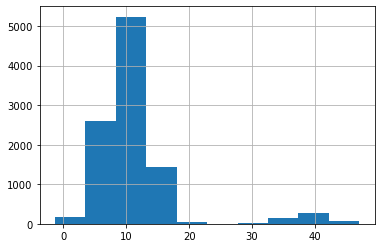

In [72]:
df['Outage_sec_perweek'].hist()
plt.show()

In [73]:
df[df['Outage_sec_perweek']<0]

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
1904,1905,I997253,fafc3cb0-9eb8-4455-8968-e68f70dff7e2,Merrimac,WI,Sauk,53561,43.39963,-89.64159,1800,...,125.610033,1575.771505,2,2,1,4,4,2,3,3
1997,1998,E582623,212475b8-76c0-4f65-a527-2e9776adaef2,Rocksprings,TX,Edwards,78880,29.97978,-100.28849,1812,...,274.286983,1385.020283,3,4,3,3,5,4,3,2
3069,3070,V877610,075760ea-9c4d-4294-b581-a1d6053437a5,Commerce,GA,Jackson,30529,34.21824,-83.48022,11435,...,124.536400,1554.132000,5,4,5,2,5,4,4,4
3629,3630,B167906,3d6987c2-c3ac-4358-af6c-d7ed3dcdfc84,Yauco,PR,Yauco,698,18.06728,-66.85273,36312,...,212.720900,NaN,4,2,3,3,5,3,2,4
4167,4168,T491190,daef8dcf-dbf7-4f42-958e-d0ccc2f70803,Dallas,TX,Dallas,75215,32.75075,-96.75806,16681,...,147.366300,1971.643000,3,4,2,3,3,3,1,2
4184,4185,X342195,999b0b5d-dc39-4b0b-94da-6397f8e27286,Joint Base Mdl,NJ,Burlington,8640,40.00350,-74.58933,7753,...,168.685100,874.589600,3,4,4,2,5,3,3,3
4427,4428,V627981,aa81bf63-bd14-47b6-8137-700796f84a6f,El Prado,NM,Taos,87529,36.47006,-105.62270,4637,...,219.387400,1109.681000,3,4,2,5,3,6,5,4
6093,6094,D115503,8db8e8dc-8afa-4ee1-b66d-03a09aa8356d,Putnam,OK,Dewey,73659,35.86958,-98.92300,220,...,103.250600,4654.693000,3,4,3,4,2,4,4,5
6463,6464,F943189,0ef28be3-fb5d-4d5b-84f8-9df9e6053345,Winger,MN,Polk,56592,47.53634,-96.00755,496,...,209.590500,4665.806000,3,3,3,3,3,2,2,2
6577,6578,N725824,1ebe696b-a5e1-417e-877f-f1d37e5dedfe,Minneapolis,KS,Ottawa,67467,39.14259,-97.69275,2500,...,173.267500,5494.745000,3,2,3,4,3,5,4,2


In [74]:
df['Email'].nunique()

23

In [75]:
df['Email'].unique()

array([10, 12,  9, 15, 16, 20, 18, 17, 14, 13, 11,  8,  6,  5, 19,  3,  7,
       21,  4,  2,  1, 23, 22])

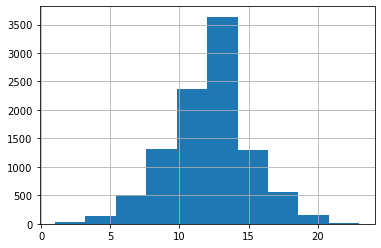

In [76]:
df['Email'].hist()
plt.show()

In [77]:
print(df['Email'].min(), df['Email'].max())

1 23


In [78]:
df['Contacts'].value_counts()

0    3680
1    3675
2    1872
3     608
4     137
5      20
6       5
7       3
Name: Contacts, dtype: int64

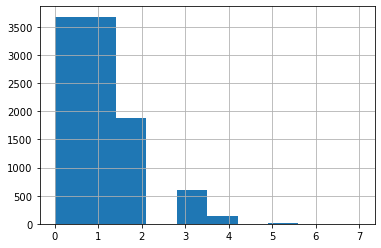

In [79]:
df['Contacts'].hist()
plt.show()

In [80]:
df['Yearly_equip_failure'].value_counts()

0    6727
1    2670
2     509
3      86
4       7
6       1
Name: Yearly_equip_failure, dtype: int64

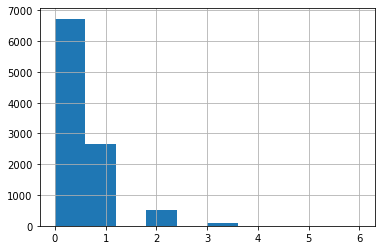

In [81]:
df['Yearly_equip_failure'].hist()
plt.show()

In [82]:
df['Techie'].value_counts()

No     6266
Yes    1257
Name: Techie, dtype: int64

In [83]:
df['Techie'].unique()

array(['No', 'Yes', nan], dtype=object)

In [84]:
df['Contract'].value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [85]:
df['Port_modem'].value_counts()

No     5166
Yes    4834
Name: Port_modem, dtype: int64

In [86]:
df['Tablet'].value_counts()

No     7009
Yes    2991
Name: Tablet, dtype: int64

In [87]:
df['InternetService'].value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [88]:
df['Phone'].value_counts()

Yes    8128
No      846
Name: Phone, dtype: int64

In [89]:
df.loc[df['Phone'].isnull(), 'Age'].mean()

52.38520408163265

In [90]:
df.loc[~df['Phone'].isnull(), 'Age'].mean()

53.379320575582256

In [91]:
df.loc[df['Phone'].isnull(), 'Multiple'].value_counts()

No     576
Yes    450
Name: Multiple, dtype: int64

In [92]:
df.loc[~df['Phone'].isnull(), 'Multiple'].value_counts()

No     4816
Yes    4158
Name: Multiple, dtype: int64

In [93]:
df['Multiple'].value_counts()

No     5392
Yes    4608
Name: Multiple, dtype: int64

In [94]:
df['OnlineSecurity'].value_counts()

No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64

In [95]:
df['OnlineBackup'].value_counts()

No     5494
Yes    4506
Name: OnlineBackup, dtype: int64

In [96]:
df['DeviceProtection'].value_counts()

No     5614
Yes    4386
Name: DeviceProtection, dtype: int64

In [97]:
df['TechSupport'].value_counts()

No     5635
Yes    3374
Name: TechSupport, dtype: int64

In [98]:
df.loc[df['TechSupport'].isnull(), 'Contacts'].value_counts()

1    373
0    372
2    167
3     66
4      9
5      3
6      1
Name: Contacts, dtype: int64

In [99]:
df.loc[~df['TechSupport'].isnull(), 'Contacts'].value_counts()

0    3308
1    3302
2    1705
3     542
4     128
5      17
6       4
7       3
Name: Contacts, dtype: int64

In [100]:
df.loc[df['TechSupport']=='No', 'Contacts'].value_counts()

1    2068
0    2046
2    1076
3     344
4      91
5       7
7       2
6       1
Name: Contacts, dtype: int64

In [101]:
df.loc[df['TechSupport']=='Yes', 'Contacts'].value_counts()

0    1262
1    1234
2     629
3     198
4      37
5      10
6       3
7       1
Name: Contacts, dtype: int64

In [102]:
df['StreamingTV'].value_counts()

No     5071
Yes    4929
Name: StreamingTV, dtype: int64

In [103]:
df['StreamingMovies'].value_counts()

No     5110
Yes    4890
Name: StreamingMovies, dtype: int64

In [104]:
df['PaperlessBilling'].value_counts()

Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64

In [105]:
df['PaymentMethod'].value_counts()

Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64

In [106]:
print(df['Tenure'].min(), df['Tenure'].max())

1.00025934 71.99928


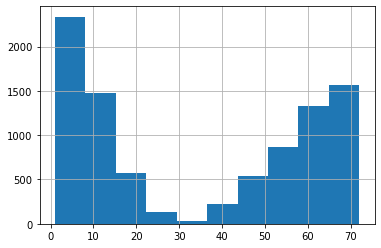

In [107]:
df['Tenure'].hist()
plt.show()

In [108]:
print(df['MonthlyCharge'].min(), df['MonthlyCharge'].max())

77.50523 315.8786


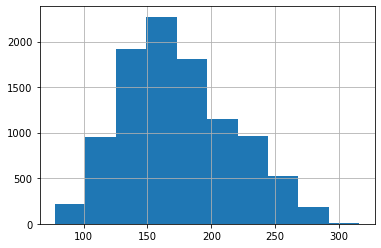

In [109]:
df['MonthlyCharge'].hist()
plt.show()

In [110]:
print(df['Bandwidth_GB_Year'].min(), df['Bandwidth_GB_Year'].max())

155.5067148 7158.982


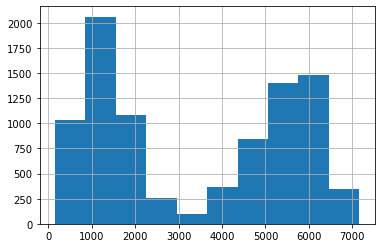

In [111]:
df['Bandwidth_GB_Year'].hist()
plt.show()

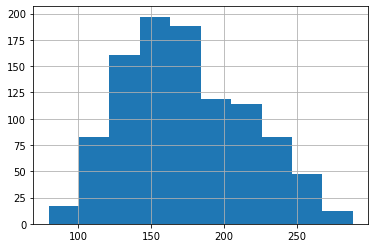

In [112]:
df.loc[df['Bandwidth_GB_Year'].isnull(), 'MonthlyCharge'].hist()
plt.show()

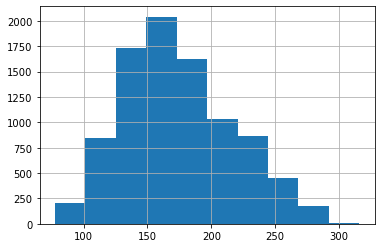

In [113]:
df.loc[~df['Bandwidth_GB_Year'].isnull(), 'MonthlyCharge'].hist()
plt.show()

In [114]:
df['item1'].nunique()

7

In [115]:
df['item1'].value_counts()

3    3448
4    3358
2    1393
5    1359
1     224
6     199
7      19
Name: item1, dtype: int64

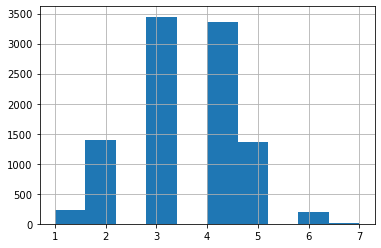

In [116]:
df['item1'].hist()
plt.show()

In [117]:
df['item2'].nunique()

7

In [118]:
df['item2'].value_counts()

3    3415
4    3412
5    1368
2    1360
1     217
6     215
7      13
Name: item2, dtype: int64

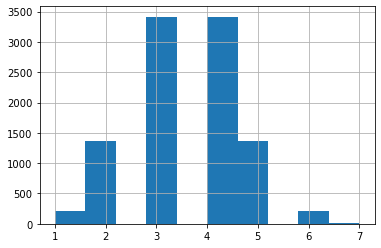

In [119]:
df['item2'].hist()
plt.show()

In [120]:
df['item3'].nunique()

8

In [121]:
df['item3'].value_counts()

3    3435
4    3410
2    1424
5    1313
6     203
1     202
7      12
8       1
Name: item3, dtype: int64

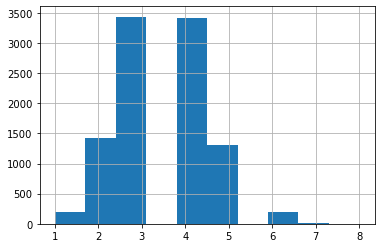

In [122]:
df['item3'].hist()
plt.show()

In [123]:
df['item4'].nunique()

7

In [124]:
df['item4'].value_counts()

4    3452
3    3430
2    1350
5    1335
1     221
6     203
7       9
Name: item4, dtype: int64

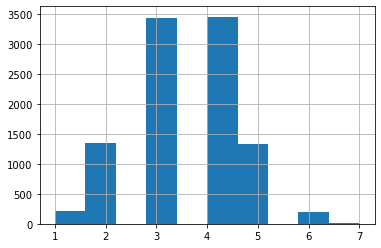

In [125]:
df['item4'].hist()
plt.show()

In [126]:
df['item5'].nunique()

7

In [127]:
df['item5'].value_counts()

3    3462
4    3417
2    1378
5    1321
1     206
6     204
7      12
Name: item5, dtype: int64

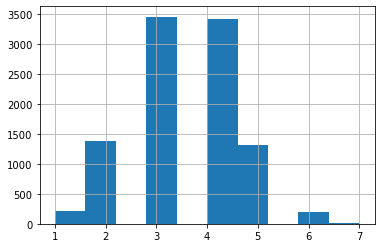

In [128]:
df['item5'].hist()
plt.show()

In [129]:
df['item6'].nunique()

8

In [130]:
df['item6'].value_counts()

3    3445
4    3333
2    1427
5    1382
6     210
1     190
7      12
8       1
Name: item6, dtype: int64

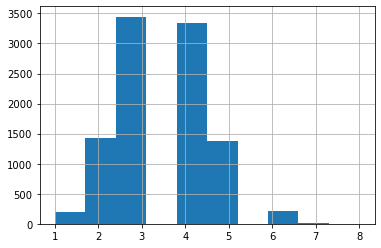

In [131]:
df['item6'].hist()
plt.show()

In [132]:
df['item7'].nunique()

7

In [133]:
df['item7'].value_counts()

4    3456
3    3446
5    1335
2    1309
6     224
1     219
7      11
Name: item7, dtype: int64

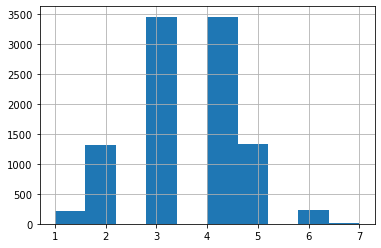

In [134]:
df['item7'].hist()
plt.show()

In [135]:
df['item8'].nunique()

8

In [136]:
df['item8'].value_counts()

3    3461
4    3400
2    1378
5    1335
1     206
6     205
7      14
8       1
Name: item8, dtype: int64

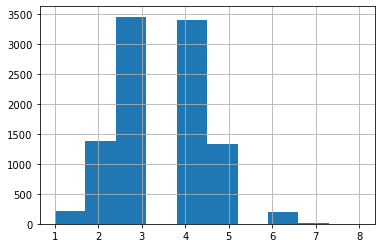

In [137]:
df['item8'].hist()
plt.show()

In [138]:
numeric_cols = ['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
               'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
               'Bandwidth_GB_Year', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
               'item7', 'item8']
len(numeric_cols)

21

In [139]:
identifier_cols = ['CaseOrder', 'Customer_id', 'Interaction']
len(identifier_cols)

3

In [140]:
categorical_cols = [col for col in df.columns if col not in numeric_cols and col not in identifier_cols]
len(categorical_cols)

27

In [141]:
df.shape

(10000, 51)

In [142]:
cols_with_definite_missing_values = ['Children', 'Age', 'Income', 'Techie', 'Phone', 'TechSupport',
                                    'Tenure', 'Bandwidth_GB_Year']
len(cols_with_definite_missing_values)

8

In [143]:
cols_with_possible_added_missing_values = ['Population', 'Outage_sec_perweek']
len(cols_with_possible_added_missing_values)

2

In [144]:
numeric_cols

['Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'item1',
 'item2',
 'item3',
 'item4',
 'item5',
 'item6',
 'item7',
 'item8']

In [145]:
for col in df.columns:
    if col in numeric_cols:
        print(col, df[col].skew())

Lat 0.0779770884181069
Lng -1.3365127195505084
Population 2.205007595921758
Children 1.433984013895491
Age 0.003698385149636859
Income 1.4477012034699133
Outage_sec_perweek 2.962615720125883
Email 0.0044679576953345805
Contacts 0.9816624318518378
Yearly_equip_failure 1.6603036562919096
Tenure 0.06906507925051338
MonthlyCharge 0.38134475449539895
Bandwidth_GB_Year 0.06299870872287021
item1 0.05326995075750829
item2 0.035131017237138976
item3 0.0603704500910398
item4 0.012571537462587254
item5 0.047298906107720216
item6 0.07598635228823272
item7 0.031011601588595988
item8 0.06090256569514567


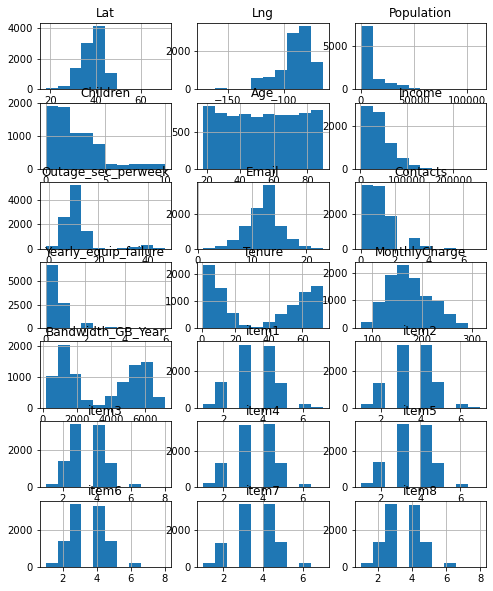

In [146]:
fig, ax = plt.subplots(7, 3, figsize=(8,10))

for i, col in enumerate(numeric_cols):
    plt.subplot(7, 3, i+1)
    df[col].hist()
    plt.title(col)
plt.show()

In [147]:
normal_numeric_cols = []
alpha = 0.05
for col in numeric_cols:
    dist = df[col].values
    statistic, p_val = stats.normaltest(dist, nan_policy='omit', axis=None)
    print(col, statistic, p_val)
    if p_val > alpha:
        normal_numeric_cols.append(col)

Lat 716.7199202887044 2.3240569938456604e-156
Lng 2407.5943211964604 0.0
Population 4478.760892809959 0.0
Children 1839.9848138315087 0.0
Age 7123.230908931626 0.0
Income 2055.869412499925 0.0
Outage_sec_perweek 6169.08948947482 0.0
Email 0.132651990235405 0.9358257399375562
Contacts 1362.7084787272547 1.2348483420873838e-296
Yearly_equip_failure 3100.375467361706 0.0
Tenure 37019.55862475566 0.0
MonthlyCharge 367.3618124917858 1.691982965785587e-80
Bandwidth_GB_Year 38993.02601643839 0.0
item1 8.300068796472281 0.015763874226060043
item2 8.099153543107425 0.01742974984463104
item3 10.887408755594606 0.004323437922623063
item4 6.336924113078363 0.042068246762574396
item5 8.743474933426958 0.012629278543302517
item6 20.794756046532505 3.051238097032718e-05
item7 3.8440525900137237 0.14631019394649977
item8 8.603102153106857 0.013547529451898398


In [148]:
normal_numeric_cols

['Email', 'item7']

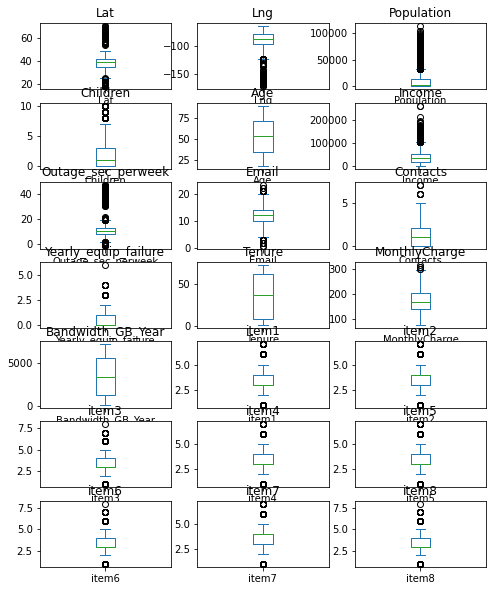

In [149]:
fig, ax = plt.subplots(7, 3, figsize=(8,10))

for i, col in enumerate(numeric_cols):
    plt.subplot(7, 3, i+1)
    df[col].plot(kind='box')
    plt.title(col)
plt.show()

In [150]:
df_numeric = df[numeric_cols]
df_numeric.head()

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,56.25100,-133.37571,38,NaN,68.0,28561.99,6.972566,10,0,1,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,44.32893,-84.24080,10446,1.0,27.0,21704.77,12.014541,12,0,1,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,45.35589,-123.24657,3735,4.0,50.0,NaN,10.245616,9,0,1,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,32.96687,-117.24798,13863,1.0,48.0,18925.23,15.206193,15,2,0,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,29.38012,-95.80673,11352,0.0,83.0,40074.19,8.960316,16,2,1,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [151]:
df_numeric_non_neg = df_numeric.loc[(df_numeric['Outage_sec_perweek']>=0) & (df_numeric['Population']>0)]
df_numeric_non_neg

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,56.25100,-133.37571,38,NaN,68.0,28561.99,6.972566,10,0,1,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,44.32893,-84.24080,10446,1.0,27.0,21704.77,12.014541,12,0,1,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,45.35589,-123.24657,3735,4.0,50.0,NaN,10.245616,9,0,1,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,32.96687,-117.24798,13863,1.0,48.0,18925.23,15.206193,15,2,0,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,29.38012,-95.80673,11352,0.0,83.0,40074.19,8.960316,16,2,1,...,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,43.43391,-72.78734,640,3.0,NaN,55723.74,9.265392,12,2,0,...,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,36.56907,-87.41694,77168,4.0,48.0,NaN,8.115849,15,2,0,...,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,35.52039,-100.44180,406,NaN,NaN,NaN,4.837696,10,0,0,...,168.220900,4159.306000,4,4,4,4,4,4,4,5
9998,33.58016,-85.13241,35575,1.0,39.0,16667.58,12.076460,14,1,0,...,252.628600,6468.457000,4,4,6,4,3,3,5,4


In [152]:
for col in df_numeric_non_neg.columns:
    df_numeric_non_neg[f'{col}_IQR'] = np.percentile(df_numeric_non_neg[col].dropna(), 75) - np.percentile(df_numeric_non_neg[col].dropna(), 25)
    
df_numeric_non_neg 

<ipython-input-152-440b2e561004>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric_non_neg[f'{col}_IQR'] = np.percentile(df_numeric_non_neg[col].dropna(), 75) - np.percentile(df_numeric_non_neg[col].dropna(), 25)
<ipython-input-152-440b2e561004>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric_non_neg[f'{col}_IQR'] = np.percentile(df_numeric_non_neg[col].dropna(), 75) - np.percentile(df_numeric_non_neg[col].dropna(), 25)
<ipython-input-152-440b2e561004>:2: SettingWithCopyWarning: 
A val

<ipython-input-152-440b2e561004>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric_non_neg[f'{col}_IQR'] = np.percentile(df_numeric_non_neg[col].dropna(), 75) - np.percentile(df_numeric_non_neg[col].dropna(), 25)
<ipython-input-152-440b2e561004>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric_non_neg[f'{col}_IQR'] = np.percentile(df_numeric_non_neg[col].dropna(), 75) - np.percentile(df_numeric_non_neg[col].dropna(), 25)
<ipython-input-152-440b2e561004>:2: SettingWithCopyWarning: 
A val

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,MonthlyCharge_IQR,Bandwidth_GB_Year_IQR,item1_IQR,item2_IQR,item3_IQR,item4_IQR,item5_IQR,item6_IQR,item7_IQR,item8_IQR
0,56.25100,-133.37571,38,NaN,68.0,28561.99,6.972566,10,0,1,...,62.651475,4353.26234,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,44.32893,-84.24080,10446,1.0,27.0,21704.77,12.014541,12,0,1,...,62.651475,4353.26234,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,45.35589,-123.24657,3735,4.0,50.0,NaN,10.245616,9,0,1,...,62.651475,4353.26234,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,32.96687,-117.24798,13863,1.0,48.0,18925.23,15.206193,15,2,0,...,62.651475,4353.26234,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,29.38012,-95.80673,11352,0.0,83.0,40074.19,8.960316,16,2,1,...,62.651475,4353.26234,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,43.43391,-72.78734,640,3.0,NaN,55723.74,9.265392,12,2,0,...,62.651475,4353.26234,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9996,36.56907,-87.41694,77168,4.0,48.0,NaN,8.115849,15,2,0,...,62.651475,4353.26234,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9997,35.52039,-100.44180,406,NaN,NaN,NaN,4.837696,10,0,0,...,62.651475,4353.26234,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9998,33.58016,-85.13241,35575,1.0,39.0,16667.58,12.076460,14,1,0,...,62.651475,4353.26234,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [153]:
df_numeric_non_neg.columns

Index(['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2',
       'item3', 'item4', 'item5', 'item6', 'item7', 'item8', 'Lat_IQR',
       'Lng_IQR', 'Population_IQR', 'Children_IQR', 'Age_IQR', 'Income_IQR',
       'Outage_sec_perweek_IQR', 'Email_IQR', 'Contacts_IQR',
       'Yearly_equip_failure_IQR', 'Tenure_IQR', 'MonthlyCharge_IQR',
       'Bandwidth_GB_Year_IQR', 'item1_IQR', 'item2_IQR', 'item3_IQR',
       'item4_IQR', 'item5_IQR', 'item6_IQR', 'item7_IQR', 'item8_IQR'],
      dtype='object')

In [154]:
df_lat = df_numeric_non_neg[['Lat', 'Lat_IQR']]
df_lng = df_numeric_non_neg[['Lng', 'Lng_IQR']]
df_population = df_numeric_non_neg[['Population', 'Population_IQR']]
df_children = df_numeric_non_neg[['Children', 'Children_IQR']]
df_age = df_numeric_non_neg[['Age', 'Age_IQR']]
df_income = df_numeric_non_neg[['Income', 'Income_IQR']]
df_outage_sec_perweek = df_numeric_non_neg[['Outage_sec_perweek', 'Outage_sec_perweek_IQR']]
df_email = df_numeric_non_neg[['Email', 'Email_IQR']]
df_contacts = df_numeric_non_neg[['Contacts', 'Contacts_IQR']]
df_yearly_equip_failure = df_numeric_non_neg[['Yearly_equip_failure', 'Yearly_equip_failure_IQR']]
df_tenure = df_numeric_non_neg[['Tenure', 'Tenure_IQR']]
df_monthly_charge = df_numeric_non_neg[['MonthlyCharge', 'MonthlyCharge_IQR']]
df_bandwidth = df_numeric_non_neg[['Bandwidth_GB_Year', 'Bandwidth_GB_Year_IQR']]
df_item1 = df_numeric_non_neg[['item1', 'item1_IQR']]
df_item2 = df_numeric_non_neg[['item2', 'item2_IQR']]
df_item3 = df_numeric_non_neg[['item3', 'item3_IQR']]
df_item4 = df_numeric_non_neg[['item4', 'item4_IQR']]
df_item5 = df_numeric_non_neg[['item5', 'item5_IQR']]
df_item6 = df_numeric_non_neg[['item6', 'item6_IQR']]
df_item7 = df_numeric_non_neg[['item7', 'item7_IQR']]
df_item8 = df_numeric_non_neg[['item8', 'item8_IQR']]

In [155]:
df_numeric_list = [df_lat, df_lng, df_population, df_children, df_age, df_income, df_outage_sec_perweek,
                  df_email, df_contacts, df_yearly_equip_failure, df_tenure, df_monthly_charge, df_bandwidth,
                  df_item1, df_item2, df_item3, df_item4, df_item5, df_item6, df_item7, df_item8]

In [156]:
for d in df_numeric_list:
    cols = list(d.columns)
    d['Q1'] = np.percentile(d[cols[0]].dropna(), 25)
    d['Q3'] = np.percentile(d[cols[0]].dropna(), 75)
    d['lower_bound'] = d['Q1'] - (1.5 * d[cols[1]])
    d['upper_bound'] = d['Q3'] + (1.5 * d[cols[1]])

<ipython-input-156-c2976f878ebc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Q1'] = np.percentile(d[cols[0]].dropna(), 25)
<ipython-input-156-c2976f878ebc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Q3'] = np.percentile(d[cols[0]].dropna(), 75)
<ipython-input-156-c2976f878ebc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

<ipython-input-156-c2976f878ebc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['upper_bound'] = d['Q3'] + (1.5 * d[cols[1]])
<ipython-input-156-c2976f878ebc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Q1'] = np.percentile(d[cols[0]].dropna(), 25)
<ipython-input-156-c2976f878ebc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

<ipython-input-156-c2976f878ebc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Q1'] = np.percentile(d[cols[0]].dropna(), 25)
<ipython-input-156-c2976f878ebc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Q3'] = np.percentile(d[cols[0]].dropna(), 75)
<ipython-input-156-c2976f878ebc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

<ipython-input-156-c2976f878ebc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Q3'] = np.percentile(d[cols[0]].dropna(), 75)
<ipython-input-156-c2976f878ebc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['lower_bound'] = d['Q1'] - (1.5 * d[cols[1]])
<ipython-input-156-c2976f878ebc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [157]:
df_lat

,Lat,Lat_IQR,Q1,Q3,lower_bound,upper_bound
0,56.25100,6.765172,35.34395,42.109122,25.196191,52.256881
1,44.32893,6.765172,35.34395,42.109122,25.196191,52.256881
2,45.35589,6.765172,35.34395,42.109122,25.196191,52.256881
3,32.96687,6.765172,35.34395,42.109122,25.196191,52.256881
4,29.38012,6.765172,35.34395,42.109122,25.196191,52.256881
...,...,...,...,...,...,...
9995,43.43391,6.765172,35.34395,42.109122,25.196191,52.256881
9996,36.56907,6.765172,35.34395,42.109122,25.196191,52.256881
9997,35.52039,6.765172,35.34395,42.109122,25.196191,52.256881
9998,33.58016,6.765172,35.34395,42.109122,25.196191,52.256881


In [158]:
for d in df_numeric_list:
    d['outlier'] = 0

<ipython-input-158-8b5e44fe5345>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['outlier'] = 0
<ipython-input-158-8b5e44fe5345>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['outlier'] = 0
<ipython-input-158-8b5e44fe5345>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [159]:
df_lat

,Lat,Lat_IQR,Q1,Q3,lower_bound,upper_bound,outlier
0,56.25100,6.765172,35.34395,42.109122,25.196191,52.256881,0
1,44.32893,6.765172,35.34395,42.109122,25.196191,52.256881,0
2,45.35589,6.765172,35.34395,42.109122,25.196191,52.256881,0
3,32.96687,6.765172,35.34395,42.109122,25.196191,52.256881,0
4,29.38012,6.765172,35.34395,42.109122,25.196191,52.256881,0
...,...,...,...,...,...,...,...
9995,43.43391,6.765172,35.34395,42.109122,25.196191,52.256881,0
9996,36.56907,6.765172,35.34395,42.109122,25.196191,52.256881,0
9997,35.52039,6.765172,35.34395,42.109122,25.196191,52.256881,0
9998,33.58016,6.765172,35.34395,42.109122,25.196191,52.256881,0


In [160]:
for d in df_numeric_list:
    cols = list(d.columns)
    d.loc[(d[cols[0]] > d[cols[-2]]), cols[-1]] = 1
    d.loc[(d[cols[0]] < d[cols[-3]]), cols[-1]] = 1

In [161]:
df_children

,Children,Children_IQR,Q1,Q3,lower_bound,upper_bound,outlier
0,NaN,3.0,0.0,3.0,-4.5,7.5,0
1,1.0,3.0,0.0,3.0,-4.5,7.5,0
2,4.0,3.0,0.0,3.0,-4.5,7.5,0
3,1.0,3.0,0.0,3.0,-4.5,7.5,0
4,0.0,3.0,0.0,3.0,-4.5,7.5,0
...,...,...,...,...,...,...,...
9995,3.0,3.0,0.0,3.0,-4.5,7.5,0
9996,4.0,3.0,0.0,3.0,-4.5,7.5,0
9997,NaN,3.0,0.0,3.0,-4.5,7.5,0
9998,1.0,3.0,0.0,3.0,-4.5,7.5,0


In [162]:
df_children[df_children['outlier']==1]

,Children,Children_IQR,Q1,Q3,lower_bound,upper_bound,outlier
30,9.0,3.0,0.0,3.0,-4.5,7.5,1
97,10.0,3.0,0.0,3.0,-4.5,7.5,1
131,8.0,3.0,0.0,3.0,-4.5,7.5,1
144,10.0,3.0,0.0,3.0,-4.5,7.5,1
145,8.0,3.0,0.0,3.0,-4.5,7.5,1
...,...,...,...,...,...,...,...
9790,10.0,3.0,0.0,3.0,-4.5,7.5,1
9860,8.0,3.0,0.0,3.0,-4.5,7.5,1
9871,10.0,3.0,0.0,3.0,-4.5,7.5,1
9901,9.0,3.0,0.0,3.0,-4.5,7.5,1


<ipython-input-163-8076aa13d7f2>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.subplots()


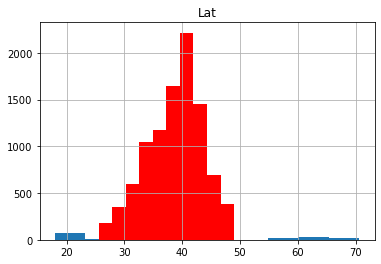

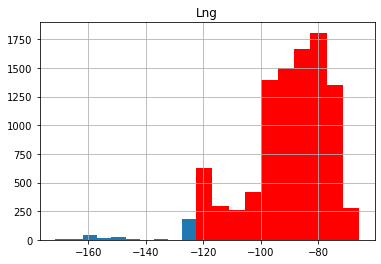

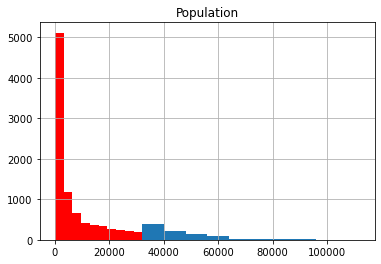

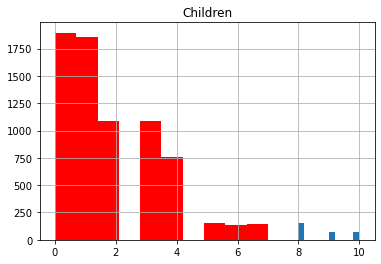

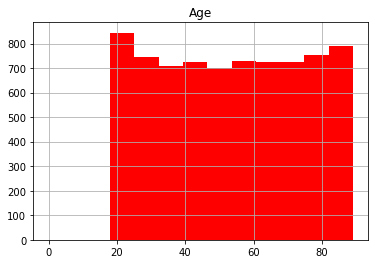

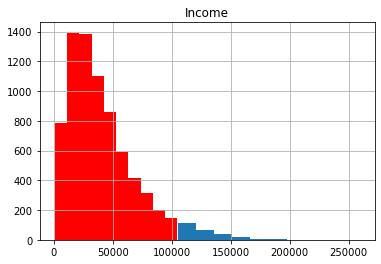

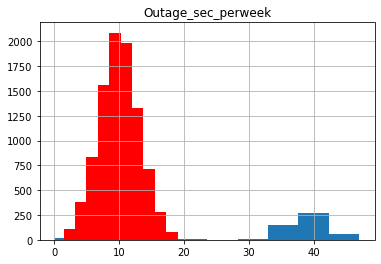

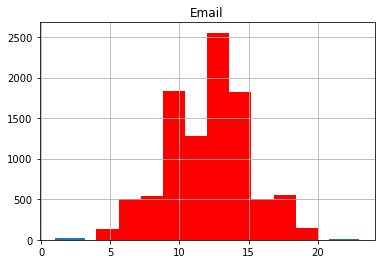

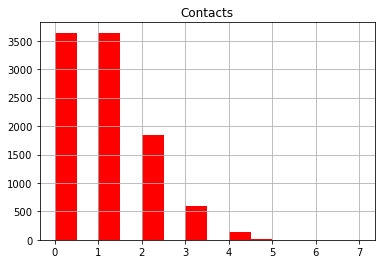

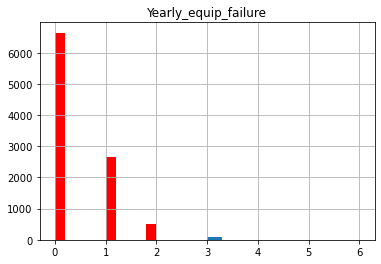

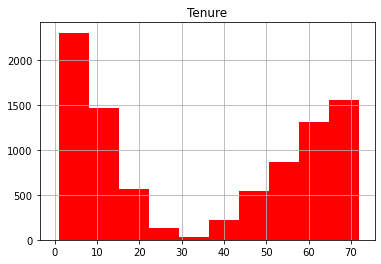

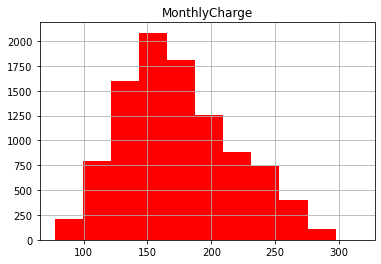

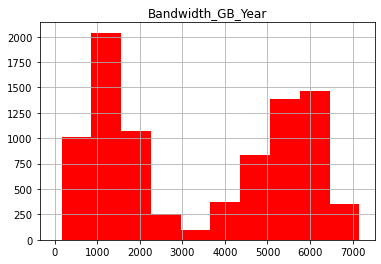

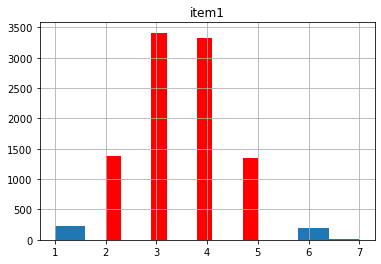

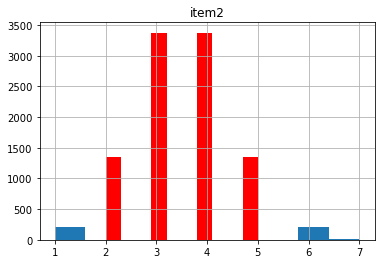

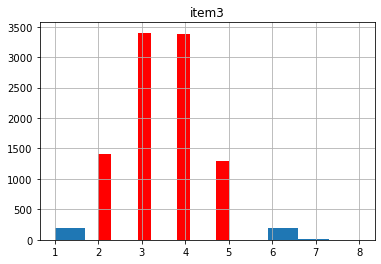

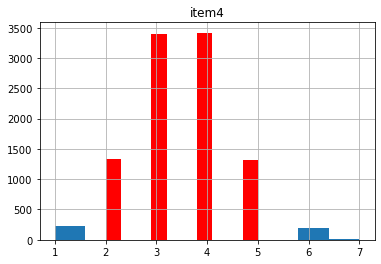

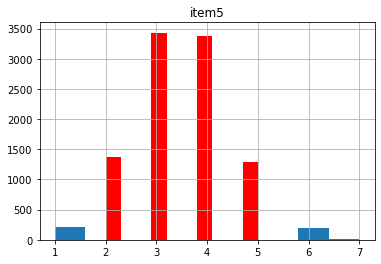

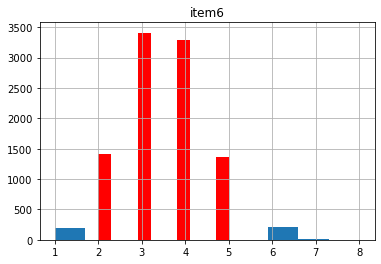

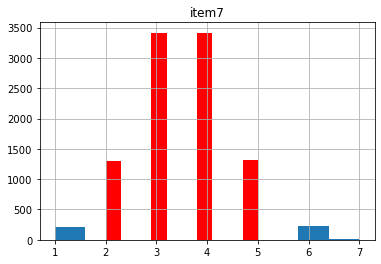

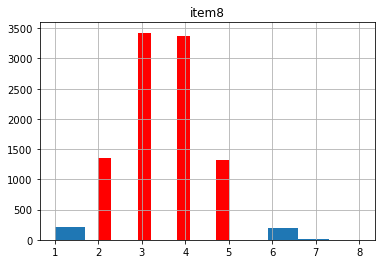

In [163]:
for d in df_numeric_list:
    cols = list(d.columns)
    plt.subplots()
    d[d['outlier']==1][cols[0]].hist()
    d[d['outlier']==0][cols[0]].hist(color='red')
    plt.title(cols[0])
plt.show()

In [164]:
for d in df_numeric_list:
    print(d.columns[0], len(d[d['outlier']==1]))

Lat 153
Lng 286
Population 913
Children 297
Age 0
Income 246
Outage_sec_perweek 526
Email 38
Contacts 8
Yearly_equip_failure 94
Tenure 0
MonthlyCharge 5
Bandwidth_GB_Year 0
item1 439
item2 438
item3 411
item4 430
item5 421
item6 407
item7 448
item8 421


In [165]:
df_copy = df.copy()
df_copy.shape

(10000, 51)

In [166]:
df_copy = df_copy[df_copy['Outage_sec_perweek']>=0]
df_copy.shape

(9989, 51)

In [167]:
for col in df_copy.columns:
    if df_copy[col].isnull().sum() > 0:
        print(col, df_copy[col].isnull().sum())

Children 2494
Age 2472
Income 2488
Techie 2476
Phone 1025
TechSupport 990
Tenure 931
Bandwidth_GB_Year 1020


In [168]:
df_copy.loc[df_copy['Population']==0, 'City'].unique()

array(['East Livermore', 'Warren', 'Bayside', 'Memphis', 'Caroleen',
       'New York', 'Natrona', 'Glendale Springs', 'Tucson',
       'Philadelphia', 'Pullman', 'Saint Albans Bay', 'Natalbany',
       'Convent Station', 'Roxana', 'Pinecrest', 'Long Beach',
       'Kansas City', 'Cisco', 'Flushing', 'Jamaica', 'Harrisburg',
       'Opolis', 'Wolf Lake', 'Washington', 'Jarbidge', 'West Lafayette',
       'Detroit', 'Montchanin', 'Syracuse', 'Norman', 'Oatman',
       'Louisville', 'Gray Hawk', 'Temple Bar Marina', 'Honolulu',
       'Springfield', 'Maryland Line', 'Moclips', 'Seattle', 'Pompey',
       'Green Pond', 'Wall', 'Coosawhatchie', 'Malone', 'Carson', 'Wayne',
       'Poplar Bluff', 'Hingham', 'South Lake Tahoe', 'Davilla',
       'Annapolis Junction', 'Ludlow', 'Torrance', 'Belden',
       'East Orleans', 'Manhattan', 'Mountain City', 'Meyers Chuck',
       'Baltimore', 'Kerrville', 'Hunt Valley', 'Nashville', 'Star Lake',
       'Alloy', 'Madison', 'Tallahassee', 'Sizerock',

In [169]:
df_copy.loc[df_copy['Population']==0, 'Population'] = np.nan

In [170]:
for col in df_copy.columns:
    if df_copy[col].isnull().sum() > 0:
        print(col, df_copy[col].isnull().sum(), ((df_copy[col].isnull().sum() / len(df_copy))*100).round(2))

Population 97 0.97
Children 2494 24.97
Age 2472 24.75
Income 2488 24.91
Techie 2476 24.79
Phone 1025 10.26
TechSupport 990 9.91
Tenure 931 9.32
Bandwidth_GB_Year 1020 10.21


In [171]:
df_copy['Zip'] = df_copy['Zip'].astype('category')

In [172]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CaseOrder             9989 non-null   int64   
 1   Customer_id           9989 non-null   object  
 2   Interaction           9989 non-null   object  
 3   City                  9989 non-null   object  
 4   State                 9989 non-null   object  
 5   County                9989 non-null   object  
 6   Zip                   9989 non-null   category
 7   Lat                   9989 non-null   float64 
 8   Lng                   9989 non-null   float64 
 9   Population            9892 non-null   float64 
 10  Area                  9989 non-null   object  
 11  Timezone              9989 non-null   object  
 12  Job                   9989 non-null   object  
 13  Children              7495 non-null   float64 
 14  Age                   7517 non-null   float64 
 15  Educ

In [173]:
df_copy['Education'].unique()

array(["Master's Degree", 'Regular High School Diploma',
       'Doctorate Degree', 'No Schooling Completed', "Associate's Degree",
       "Bachelor's Degree", 'Some College, Less than 1 Year',
       'GED or Alternative Credential',
       'Some College, 1 or More Years, No Degree',
       '9th Grade to 12th Grade, No Diploma',
       'Nursery School to 8th Grade', 'Professional School Degree'],
      dtype=object)

In [174]:
df_copy['Contract'].unique()

array(['One year', 'Month-to-month', 'Two Year'], dtype=object)

In [175]:
education_mapping = {'No Schooling Completed': 1, 'Nursery School to 8th Grade': 2, 
                     '9th Grade to 12th Grade, No Diploma': 3, 'Regular High School Diploma': 4,
                    'GED or Alternative Credential': 4, 'Some College, Less than 1 Year': 5,
                    'Some College, 1 or More Years, No Degree': 5, "Associate's Degree": 6,
                    "Bachelor's Degree": 7, "Master's Degree": 8, 'Doctorate Degree': 9,
                    'Professional School Degree': 9}
len(education_mapping)

12

In [176]:
df_copy['Education_Encoded'] = df_copy['Education'].map(education_mapping)
df_copy.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8,Education_Encoded
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38.0,...,904.536110,5,5,5,3,4,4,3,4,8
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446.0,...,800.982766,3,4,3,3,4,3,4,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735.0,...,2054.706961,4,4,2,4,4,3,3,3,4
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863.0,...,2164.579412,4,4,4,2,5,4,3,3,9
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352.0,...,271.493436,4,4,4,3,4,4,4,5,8


In [177]:
df_copy['Education_Encoded'].isnull().sum()

0

In [178]:
contract_mapping = {'Month-to-month': 1, 'One year': 2, 'Two Year': 3}

In [179]:
df_copy['Contract_Encoded'] = df_copy['Contract'].map(contract_mapping)
df_copy.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,item1,item2,item3,item4,item5,item6,item7,item8,Education_Encoded,Contract_Encoded
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38.0,...,5,5,5,3,4,4,3,4,8,2
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446.0,...,3,4,3,3,4,3,4,4,4,1
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735.0,...,4,4,2,4,4,3,3,3,4,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863.0,...,4,4,4,2,5,4,3,3,9,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352.0,...,4,4,4,3,4,4,4,5,8,1


In [180]:
df_copy['Contract_Encoded'].isnull().sum()

0

In [181]:
df_copy['Techie'].value_counts()

No     6259
Yes    1254
Name: Techie, dtype: int64

In [182]:
df_copy['Techie'] = df_copy['Techie'].fillna('No')

In [183]:
for col in df_copy.columns:
    if df_copy[col].isnull().sum() > 0:
        print(col, df_copy[col].isnull().sum())

Population 97
Children 2494
Age 2472
Income 2488
Phone 1025
TechSupport 990
Tenure 931
Bandwidth_GB_Year 1020


In [184]:
df_copy['Phone'].value_counts()

Yes    8118
No      846
Name: Phone, dtype: int64

In [185]:
df_copy['Phone'] = df_copy['Phone'].fillna('Yes')

In [186]:
for col in df_copy.columns:
    if df_copy[col].isnull().sum() > 0:
        print(col, df_copy[col].isnull().sum())

Population 97
Children 2494
Age 2472
Income 2488
TechSupport 990
Tenure 931
Bandwidth_GB_Year 1020


In [187]:
df_copy['TechSupport'].value_counts()

No     5628
Yes    3371
Name: TechSupport, dtype: int64

In [188]:
df_copy['TechSupport'] = df_copy['TechSupport'].fillna('No')

In [189]:
for col in df_copy.columns:
    if df_copy[col].isnull().sum() > 0:
        print(col, df_copy[col].isnull().sum())

Population 97
Children 2494
Age 2472
Income 2488
Tenure 931
Bandwidth_GB_Year 1020


In [190]:
le_cols = ['City',
 'State',
 'County',
 'Zip',
 'Area',
 'Timezone',
 'Job',
 'Employment',
 'Marital',
 'Gender',
 'Churn',
 'Techie',
 'Port_modem',
 'Tablet',
 'InternetService',
 'Phone',
 'Multiple',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod']

In [191]:
le_dict = {}
for col in le_cols:
    le = LabelEncoder()
    df_copy[f'{col}_Encoded'] = le.fit_transform(df_copy[col])
    le_dict[col] = le

In [192]:
for col in df_copy.columns:
    if df_copy[col].isnull().sum() > 0:
        print(col, df_copy[col].isnull().sum())

Population 97
Children 2494
Age 2472
Income 2488
Tenure 931
Bandwidth_GB_Year 1020


In [193]:
df_copy.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'City', 'State', 'County',
       'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone', 'Job',
       'Children', 'Age', 'Education', 'Employment', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8', 'Education_Encoded',
       'Contract_Encoded', 'City_Encoded', 'State_Encoded', 'County_Encoded',
       'Zip_Encoded', 'Area_Encoded', 'Timezone_Encoded', 'Job_Encoded',
       'Employment_Encoded', 'Marital_Encoded', 'Gender_Encoded',
       'Churn_Encoded', 'Techie_Encoded', 'Port_modem_Encoded

In [194]:
df_copy_encoded = df_copy[['item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8', 'Education_Encoded',
       'Contract_Encoded','Churn_Encoded', 'Techie_Encoded', 'Port_modem_Encoded',
       'Tablet_Encoded', 'Phone_Encoded',
       'Multiple_Encoded', 'OnlineSecurity_Encoded', 'OnlineBackup_Encoded',
       'DeviceProtection_Encoded', 'TechSupport_Encoded',
       'StreamingTV_Encoded', 'StreamingMovies_Encoded',
       'PaperlessBilling_Encoded','Lat','Lng','Population','Children','Age','Income',
        'Outage_sec_perweek','Email','Contacts','Yearly_equip_failure',
        'Tenure','MonthlyCharge','Bandwidth_GB_Year']]

In [195]:
df_copy_encoded.shape

(9989, 36)

In [196]:
for col in df_copy_encoded.columns:
    if df_copy_encoded[col].isnull().sum() > 0:
        print(col, df_copy_encoded[col].isnull().sum())

Population 97
Children 2494
Age 2472
Income 2488
Tenure 931
Bandwidth_GB_Year 1020


In [197]:
mice_imputer = IterativeImputer()
df_copy_encoded.iloc[:, :] = mice_imputer.fit_transform(df_copy_encoded)

<ipython-input-197-b32229f619f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_encoded.iloc[:, :] = mice_imputer.fit_transform(df_copy_encoded)


In [198]:
for col in df_copy_encoded.columns:
    if df_copy_encoded[col].isnull().sum() > 0:
        print(col, df_copy_encoded[col].isnull().sum())

In [199]:
df_copy_encoded.head()

,item1,item2,item3,item4,item5,item6,item7,item8,Education_Encoded,Contract_Encoded,...,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,5.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0,8.0,2.0,...,1.737033,68.0,28561.990000,6.972566,10.0,0.0,1.0,6.795513,171.449762,904.536110
1,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,1.0,...,1.000000,27.0,21704.770000,12.014541,12.0,0.0,1.0,1.156681,242.948015,800.982766
2,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,...,4.000000,50.0,39934.251228,10.245616,9.0,0.0,1.0,15.754144,159.440398,2054.706961
3,4.0,4.0,4.0,2.0,5.0,4.0,3.0,3.0,9.0,3.0,...,1.000000,48.0,18925.230000,15.206193,15.0,2.0,0.0,17.087227,120.249493,2164.579412
4,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,8.0,1.0,...,0.000000,83.0,40074.190000,8.960316,16.0,2.0,1.0,1.670972,150.761216,271.493436


In [200]:
df_copy_encoded['Children'].nunique()

2505

In [201]:
df_encoded_rounded = df_copy_encoded.copy()

In [202]:
df_encoded_rounded['Children'] = df_encoded_rounded['Children'].apply(lambda x: round(x))

In [203]:
df_encoded_rounded['Children'].nunique()

11

In [204]:
df_encoded_rounded['Population'] = df_encoded_rounded['Population'].apply(lambda x: round(x))

In [205]:
df_encoded_rounded['Population'].nunique()

5955

In [206]:
df_encoded_rounded['Age'] = df_encoded_rounded['Age'].apply(lambda x: round(x))

In [207]:
df_encoded_rounded

,item1,item2,item3,item4,item5,item6,item7,item8,Education_Encoded,Contract_Encoded,...,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,5.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0,8.0,2.0,...,2,68,28561.990000,6.972566,10.0,0.0,1.0,6.795513,171.449762,904.536110
1,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,1.0,...,1,27,21704.770000,12.014541,12.0,0.0,1.0,1.156681,242.948015,800.982766
2,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,...,4,50,39934.251228,10.245616,9.0,0.0,1.0,15.754144,159.440398,2054.706961
3,4.0,4.0,4.0,2.0,5.0,4.0,3.0,3.0,9.0,3.0,...,1,48,18925.230000,15.206193,15.0,2.0,0.0,17.087227,120.249493,2164.579412
4,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,8.0,1.0,...,0,83,40074.190000,8.960316,16.0,2.0,1.0,1.670972,150.761216,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.0,2.0,3.0,3.0,4.0,3.0,2.0,3.0,5.0,1.0,...,3,34,55723.740000,9.265392,12.0,2.0,0.0,68.197130,159.828800,6511.253000
9996,4.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,4.0,3.0,...,4,48,39891.050630,8.115849,15.0,2.0,0.0,61.040370,208.856400,5695.952000
9997,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,2.0,1.0,...,2,54,39936.404683,4.837696,10.0,0.0,0.0,46.085676,168.220900,4159.306000
9998,4.0,4.0,6.0,4.0,3.0,3.0,5.0,4.0,7.0,3.0,...,1,39,16667.580000,12.076460,14.0,1.0,0.0,71.095600,252.628600,6468.457000


In [208]:
pca_dataset = df_encoded_rounded[numeric_cols]
pca_dataset.head()

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,56.25100,-133.37571,38,2,68,28561.990000,6.972566,10.0,0.0,1.0,...,171.449762,904.536110,5.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0
1,44.32893,-84.24080,10446,1,27,21704.770000,12.014541,12.0,0.0,1.0,...,242.948015,800.982766,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0
2,45.35589,-123.24657,3735,4,50,39934.251228,10.245616,9.0,0.0,1.0,...,159.440398,2054.706961,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0
3,32.96687,-117.24798,13863,1,48,18925.230000,15.206193,15.0,2.0,0.0,...,120.249493,2164.579412,4.0,4.0,4.0,2.0,5.0,4.0,3.0,3.0
4,29.38012,-95.80673,11352,0,83,40074.190000,8.960316,16.0,2.0,1.0,...,150.761216,271.493436,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0


In [209]:
pca_dataset.isnull().sum()

Lat                     0
Lng                     0
Population              0
Children                0
Age                     0
Income                  0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
item1                   0
item2                   0
item3                   0
item4                   0
item5                   0
item6                   0
item7                   0
item8                   0
dtype: int64

In [210]:
pca_colnames = list(pca_dataset.columns)

In [211]:
scaler = StandardScaler()
pca_normalized = scaler.fit_transform(pca_dataset)

In [212]:
pca_normalized = pd.DataFrame(pca_normalized, columns=pca_colnames)
pca_normalized.head()

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,3.218756,-2.809733,-0.681549,-0.048436,0.800302,-0.462754,-0.640296,-0.666455,-1.005655,0.946196,...,-0.060630,-1.143675,1.453630,1.444568,1.471484,-0.485026,0.495074,0.486749,-0.495780,0.489976
1,1.024732,0.431592,0.041063,-0.569806,-1.423086,-0.741871,0.078132,-0.005459,-1.005655,0.946196,...,1.589561,-1.191263,-0.473163,0.478136,-0.474455,-0.485026,0.495074,-0.481033,0.476794,0.489976
2,1.213724,-2.141535,-0.424872,0.994302,-0.175819,0.000143,-0.173921,-0.996952,-1.005655,0.946196,...,-0.337808,-0.615106,0.490234,0.478136,-1.447425,0.490004,0.495074,-0.481033,-0.495780,-0.482286
3,-1.066233,-1.745821,0.278301,-0.569806,-0.284277,-0.855010,0.532909,0.986034,1.017605,-0.625918,...,-1.242340,-0.564613,0.490234,0.478136,0.498514,-1.460055,1.471054,0.486749,-0.495780,-0.482286
4,-1.726304,-0.331388,0.103965,-1.091175,1.613737,0.005839,-0.357063,1.316532,1.017605,0.946196,...,-0.538125,-1.434593,0.490234,0.478136,0.498514,-0.485026,0.495074,0.486749,0.476794,1.462237


In [213]:
pca = PCA(n_components=pca_normalized.shape[1])
test_pca_normalized = pca.fit_transform(pca_normalized)
test_pca_normalized = pd.DataFrame(test_pca_normalized)
test_pca_normalized.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11',
                              'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21']
test_pca_normalized.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,1.916002,-1.463982,1.790882,-3.242987,-0.841683,-1.786200,1.939834,0.482146,-1.365552,0.714231,...,-0.595007,-0.502624,0.082653,0.855160,-0.750338,-0.252259,-0.197880,0.016903,0.024958,-0.043051
1,-0.202850,-1.626431,0.474500,-0.761330,1.338295,0.439315,0.720542,-0.365102,-1.098585,-0.911785,...,0.899686,-1.196490,0.631049,0.885049,0.962729,0.390542,0.215234,-0.451885,-0.705103,-0.045503
2,-0.682424,-0.957036,0.189563,-1.727095,-0.618115,-0.090809,2.241752,0.759671,-0.696445,0.376209,...,-0.799538,-0.185410,-0.121418,-0.156649,-0.450835,0.334826,0.963930,-1.323332,0.440854,0.051959
3,0.032061,-0.748842,2.172432,0.914866,-0.250301,-1.689166,0.558739,-1.146919,-0.064677,0.594246,...,-0.216646,1.182506,0.032069,-1.311109,-0.026055,-0.715446,0.379856,0.189977,0.014516,0.133471
4,1.343078,-1.835361,0.765723,1.654388,-0.203001,-1.391323,-1.188688,0.803850,-0.586219,1.397623,...,0.755442,0.357586,1.329342,-0.989704,0.224955,0.105461,0.128775,0.180974,-0.080062,-0.043177


In [214]:
loadings = pd.DataFrame(pca.components_.T,
                       columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11',
                              'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21'],
                        index=pca_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
Lat,-0.001301,-0.023222,-0.008191,-0.708538,-0.081545,-0.124475,0.052302,-0.087681,-0.000140,0.081310,...,-0.011113,-0.013340,-0.083032,0.662760,0.093404,-0.043063,-0.007694,0.014149,-0.011686,0.001006
Lng,0.008204,0.010125,0.022116,0.164598,0.068708,0.554573,-0.635452,0.028016,-0.009658,-0.255171,...,0.211785,0.061487,-0.071000,0.359511,0.065248,-0.037502,0.016662,-0.000032,-0.024658,0.001372
Population,-0.001450,-0.001250,0.018104,0.648231,0.063473,-0.194935,0.322921,0.065696,0.078639,0.024712,...,-0.134850,-0.013452,-0.157908,0.608088,0.093609,-0.011623,-0.003058,-0.000671,-0.008162,-0.000012
Children,0.005504,0.008251,0.016494,-0.043176,-0.021057,0.625992,0.158916,0.022203,0.047849,0.368808,...,-0.652172,-0.023677,0.023463,0.008656,-0.046549,0.015422,0.011477,0.033851,-0.006140,-0.027216
Age,0.007450,-0.010463,-0.006731,0.020752,-0.043035,-0.309428,-0.450237,0.357572,-0.150349,0.371656,...,-0.290577,0.131470,-0.086186,0.005131,0.004337,0.005543,-0.012238,0.005987,0.017618,0.027686
Income,-0.000301,0.004349,0.024288,-0.063603,-0.019098,0.142762,0.122680,0.375918,0.768471,0.240651,...,0.355427,-0.057305,0.011699,-0.009300,-0.062414,0.003728,-0.000525,0.009884,0.005080,-0.000592
Outage_sec_perweek,-0.013830,0.017277,-0.048461,-0.104113,0.693333,0.008998,0.106739,0.030997,0.028535,0.025270,...,0.014092,0.687218,-0.118774,-0.035756,0.009476,0.014833,-0.018782,0.010706,-0.004009,0.006018
Email,0.008684,-0.019497,-0.004829,0.151835,0.093601,-0.003694,-0.145164,-0.559728,-0.058390,0.709973,...,0.339070,-0.044884,0.063744,0.036760,-0.014619,0.015047,0.005119,-0.016294,0.000803,0.000273
Contacts,-0.008417,0.003161,-0.009786,0.033530,0.004150,-0.322252,-0.424232,0.169322,0.289960,0.103197,...,-0.209457,-0.001500,0.044039,-0.004805,-0.038021,0.004630,-0.025813,0.021178,-0.001149,-0.001175
Yearly_equip_failure,-0.008087,0.018086,0.007761,-0.017051,0.044858,0.136649,0.164992,0.608360,-0.534052,0.266706,...,0.354493,-0.115380,0.022683,0.041583,0.010748,0.013657,-0.000759,0.006813,-0.021769,-0.000330


In [215]:
cov_matrix = np.dot(pca_normalized.T, pca_normalized) / pca_normalized.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

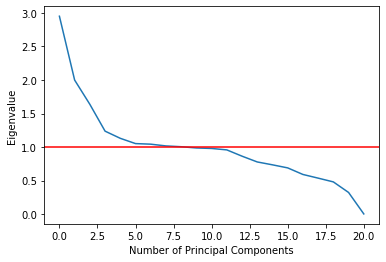

In [216]:
plt.plot(eigenvalues)
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='red')
plt.show()

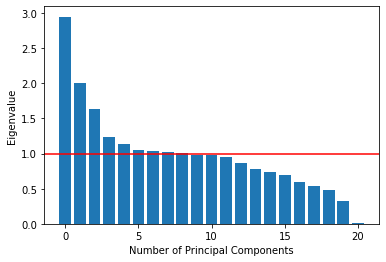

In [217]:
plt.bar(range(len(eigenvalues)), eigenvalues)
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='red')
plt.show()

In [218]:
eigenvalues

[2.948855202835719,
 1.9981691634998349,
 1.636540759116563,
 1.237075643609877,
 1.130449200909987,
 1.0519400805768244,
 1.043184381424961,
 1.0170145785155578,
 1.005200220620377,
 0.9867265059749388,
 0.9794661162966218,
 0.9580559547432064,
 0.8644199080690513,
 0.7784246434398431,
 0.7355104592565794,
 0.6899658650923327,
 0.5920162779546613,
 0.5373764701751326,
 0.48127841724641,
 0.3239944826571103,
 0.004335667984411911]

In [219]:
eigenvalues_to_keep = [e for e in eigenvalues if e >= 1]
eigenvalues_to_keep

[2.948855202835719,
 1.9981691634998349,
 1.636540759116563,
 1.237075643609877,
 1.130449200909987,
 1.0519400805768244,
 1.043184381424961,
 1.0170145785155578,
 1.005200220620377]

In [220]:
len(eigenvalues_to_keep)

9

In [221]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14042168, 0.23557259, 0.3135031 , 0.37241147, 0.42624238,
       0.47633476, 0.52601021, 0.57443948, 0.62230615, 0.66929313,
       0.71593437, 0.76155609, 0.80271894, 0.83978678, 0.87481109,
       0.9076666 , 0.93585786, 0.96144721, 0.98436523, 0.99979354,
       1.        ])

In [222]:
#df_copy.head()

In [223]:
#df_copy.isnull().sum().sum()

In [224]:
#df_encoded_rounded.head()

In [225]:
#df_encoded_rounded.isnull().sum().sum()

In [226]:
#len(df_encoded_rounded)

In [227]:
#len(df_copy)

In [228]:
#df_final_numeric_cols = df_encoded_rounded[numeric_cols]
#df_final_numeric_cols.head()

In [229]:
#identifier_and_categorical_cols = [col for col in df_copy.columns if col not in numeric_cols]
#df_final_categorical_cols = df_copy[identifier_and_categorical_cols]
#df_final_categorical_cols.head()

In [230]:
#df_final_categorical_cols.isnull().sum().sum()

In [231]:
#assert len(df_final_categorical_cols) == len(df_final_numeric_cols)

In [232]:
#print(len(df_final_categorical_cols), len(df_final_numeric_cols))

In [233]:
#df_final = pd.concat([df_final_categorical_cols, df_final_numeric_cols], axis=1)
#df_final.head()

In [234]:
#df_final.shape

In [235]:
#df_final.isnull().sum().sum()

In [236]:
#df_final.columns

In [237]:
#df_final.to_csv('churn_data_clean_with_encoded_cat_vars.csv')

In [238]:
#len(df.columns)

In [239]:
#original_cols = [col for col in df.columns]
#original_cols

In [240]:
#df_final_original = df_final[original_cols]
#df_final_original.head()

In [241]:
#df_final_original.isnull().sum().sum()

In [242]:
#df_final_original.to_csv('churn_data_clean_with_original_vars.csv')

In [271]:
#with pd.option_context('display.max_columns', 21, 'display.max_colwidth', -50):
    #display(loadings)